# CQF Module 2 Exercise Solution (Code Repository)
**Author**: 
Frank Salvador Ygnacio Rosas 

**Cohort**: January 2022

## Importing base libraries

In [1]:
# Importing base packages
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm
from numpy.linalg import multi_dot
import matplotlib.pyplot as plt

# Import cufflinks
import cufflinks as cf
cf.set_config_file(
    offline=True, 
    dimensions=((1000,600)),
    theme= 'henanigans')

# Import plotly express for EF plot
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
px.defaults.template = "plotly_dark"
px.defaults.width = 950
px.defaults.height = 600

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Exam Development 

## Question 1 

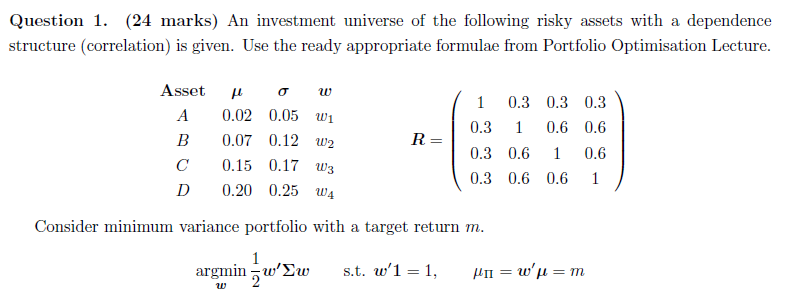

In [2]:
#summarizing given information...

# vector of asset expected returns "mu"
mu = np.array([0.02, 0.07, 0.15, 0.20])[:,np.newaxis]

# standard deviation vector (1D)
sigma1D = np.array([0.05, 0.12, 0.17, 0.25])
# arranged standard deviation vector (2D)
sigma2D = sigma1D[:,np.newaxis]
# diagonalized standard deviation matrix "S" (NxN)
S = np.diag(sigma1D)

# correlation matrix "R"
R = np.array(
    [[1, 0.3, 0.3, 0.3], 
     [0.3, 1, 0.6, 0.6], 
     [0.3, 0.6, 1, 0.6], 
     [0.3, 0.6, 0.6, 1]])

# covariance matrix "E"
E = S @ R @ S

# number of assets
numb_assets = mu.shape[0]  

### Q1-1:

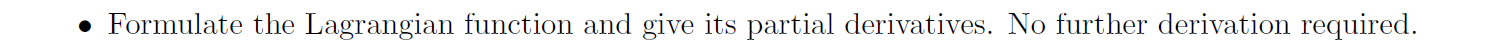

**Solution Q1-1**: solved in the *YGNACIO_REPORT_E1_.pdf* file.



### Q1-2:

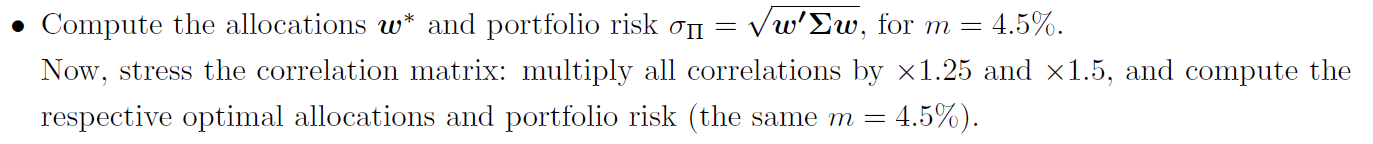

**Solution Q1-2**

To find $\omega *$, we should know $\lambda$ values from the _Lagrange_ Q1-1 solution over $\omega *$. These were _solved in the YGNACIO_REPORT_E1.pdf_ file.

So, we know that optimal weights vector is:

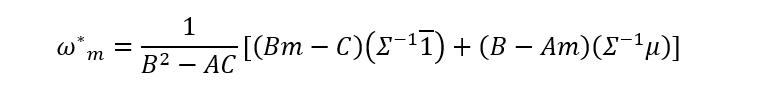

Where:

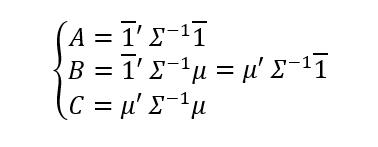

In [3]:
# function to estimate the optimal allocation given the formula obtained above...

def allocationsMethod(number_assets, m, mu_vector, cov_matrix):
    # unit vector definition
    unitVector = np.ones(number_assets).reshape(-1,1)
    # A variable definition
    A = unitVector.T @ np.linalg.inv(cov_matrix) @ unitVector
    # B variable definition (we will be use the first definition...)
    B = unitVector.T @ np.linalg.inv(cov_matrix) @ mu_vector
    # C variable definition 
    C = mu_vector.T @ np.linalg.inv(cov_matrix) @ mu_vector
    
    # finding omega's w* optimal weights
    omega = (1/((B**2) - A*C)) * (
        (B*m - C)*(np.linalg.inv(cov_matrix) @ unitVector) + \
        (B - A*m)*(np.linalg.inv(cov_matrix) @ mu_vector)
    )
    # finding portfolio risk sigma pi
    sigmaPi = np.sqrt(omega.T @ cov_matrix @ omega)
    
    return omega, sigmaPi

In [4]:
# solutions Q1-2 | Part 1
omegaOpt_and_riskPortfolio = \
allocationsMethod(numb_assets, 0.045, mu, E)

**Q1-2 | a)** Compute ω* for m=4.5% and find its portfolio risk, such as 𝜎𝜋 =√(ω'Σ ω):

In [5]:
print(" - 𝜔∗ : ")
print(omegaOpt_and_riskPortfolio[0], "\n")

print(" - 𝜎𝜋 : ")
print(omegaOpt_and_riskPortfolio[1])

 - 𝜔∗ : 
[[0.78511066]
 [0.05386419]
 [0.13355472]
 [0.02747042]] 

 - 𝜎𝜋 : 
[[0.05840091]]


**Q1-2 | b)** Now, stress the correlation matrix: multiply all correlations by x1.25 and x1.5, and compute the respective optimal allocations and portfolio risk (the same m = 4.5%).

In [6]:
# Implies to find a covariance matrix with the stressed correlation matrix R 
# by a certain stress factor p, such as:

# stressed correlation matrices
R_stressed_125 = R * 1.25
R_stressed_150 = R * 1.50

# preserving diagonal values = 1 as top corr. value
np.fill_diagonal(R_stressed_125, 1)
np.fill_diagonal(R_stressed_150, 1)

# finding stressed covariance matrices
E_1_25 = S @ R_stressed_125 @ S
E_1_50 = S @ R_stressed_150 @ S

# now we are able to find the new weights & portfolio risk
omegaOpt_and_riskPortfolio_stressed_1_25 = \
allocationsMethod(numb_assets, 0.045, mu, E_1_25)

omegaOpt_and_riskPortfolio_stressed_1_50 = \
allocationsMethod(numb_assets, 0.045, mu, E_1_50)

In [7]:
print("Results with Stressed Corr. Matrix by x1.25:")
print(" - 𝜔∗ : ")
print(omegaOpt_and_riskPortfolio_stressed_1_25[0], "\n")

print(" - 𝜎𝜋 : ")
print(omegaOpt_and_riskPortfolio_stressed_1_25[1], "\n")

print("***" * 15)

print("Results with Stressed Corr. Matrix by x1.50:")
print(" - 𝜔∗ : ")
print(omegaOpt_and_riskPortfolio_stressed_1_50[0], "\n")

print(" - 𝜎𝜋 : ")
print(omegaOpt_and_riskPortfolio_stressed_1_50[1])

Results with Stressed Corr. Matrix by x1.25:
 - 𝜔∗ : 
[[ 0.81818944]
 [-0.00940302]
 [ 0.17896585]
 [ 0.01224773]] 

 - 𝜎𝜋 : 
[[0.0607102]] 

*********************************************
Results with Stressed Corr. Matrix by x1.50:
 - 𝜔∗ : 
[[ 0.87617647]
 [-0.14612952]
 [ 0.32570145]
 [-0.0557484 ]] 

 - 𝜎𝜋 : 
[[0.06109091]]


### Q1-3: 

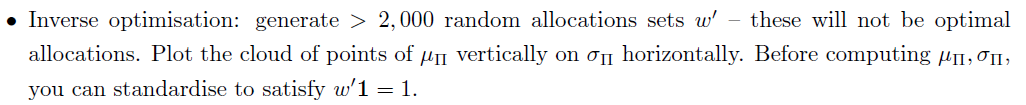

In [8]:
#ramdom allocations sets sN
N = 2500

# computing random weights between (-1, 1)
omegas = np.random.uniform(
    -1,1, N * numb_assets
).reshape(N, numb_assets) 

# standarization by budget constraint, i.e., sum weights = 1
omegas = np.apply_along_axis(
    lambda x: x - (np.sum(x) - 1)/len(x), 1, omegas
) 

# computing sigmas of different portfolios from omegas
sigmasPi = (omegas @ S @ omegas.T).diagonal()

# comuting mean returns of different portfolios from omegas
musPi = (omegas @ mu).reshape(-1)

In [9]:
# final plot of portfolios
fig = px.scatter(
    x=sigmasPi, y=musPi, color_discrete_sequence=['orange'],
    labels={"x":"Portfolio Volatilities", "y":"Portfolio Returns"},
    title="Random Portfolios | Inverse Optimization"
).update_traces(
    mode='markers', marker=dict(symbol='cross')
)

fig.show()

***

## Question 2

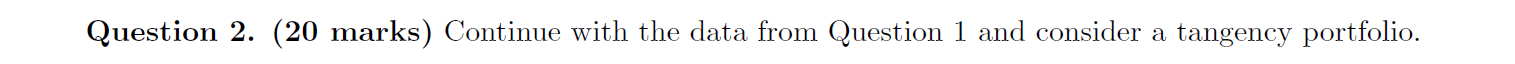

### Q2-1

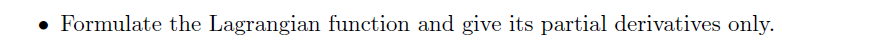

**Solution Q2-1**: _solved in the YGNACIO_REPORT_E1_.pdf file.

### Q2-2

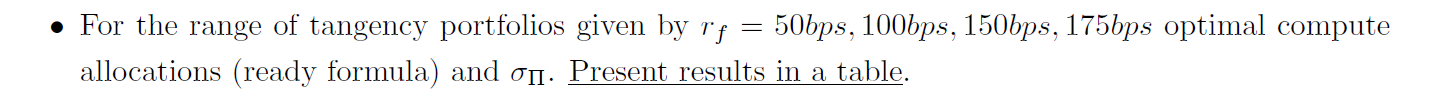

Using the following _ready formulae_ (*) for the weights of the Tangency Portfolio:

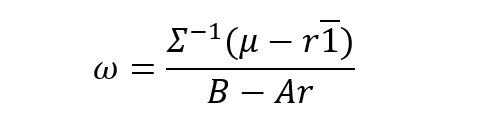

(*) To see the briefly explanaition where it comes from, please check the _YGNACIO_REPORT_E1.pdf file_.

In [10]:
# tangency portfolio function considering mu & sigma from Q1

def tangencyPortfolio(number_assets, rf, mu_vector, cov_matrix):
    # unit vector definition
    unitVector = np.ones(number_assets).reshape(-1,1)
    # A variable definition
    A = unitVector.T @ np.linalg.inv(cov_matrix) @ unitVector
    # B variable definition (we will be use the first definition...)
    B = unitVector.T @ np.linalg.inv(cov_matrix) @ mu_vector
    
    # computing the weights for the Tangency Portfolio given rf
    omega = (np.linalg.inv(cov_matrix) @ mu_vector \
             - np.linalg.inv(cov_matrix) @ (rf * unitVector))/(B - (A*rf))
    
    # computing mu pi, i.e, mean returns of the tangency portfolio
    muPi = omega.T @ mu_vector
    
    # computing sigma pi, i.e., volatility of the tangency portfolio
    sigmaPi = np.sqrt(omega.T @ cov_matrix @ omega)
    
    return omega, muPi.reshape(-1), sigmaPi.reshape(-1)

In [11]:
# computing T.Portfolio over each risk-free value 

# list of risk-free values (as a fraction, not basis)
r_f = [0.005,0.01,0.015,0.0175]

# empty dictionary
tangencies_portfolios_dict = {}

# name of assets
assetsName = ["asset_A", "asset_B", "asset_C", "asset_D"]

# iteration by each risk-free rate value
for RFA in r_f:
    # getting results from tangency portfolio func.
    omegaTP, muPiTP, sigmaPiTP = tangencyPortfolio(
        numb_assets, RFA, mu, E
    )
    # merging list of asset names with omega values
    omegas_per_asset = zip(assetsName, list(omegaTP.reshape(-1)))
    # computing dict. with info given RFA for data alignment
    dictRFAInfo = {
        key: value for (key, value) in omegas_per_asset
    }
    # adding mu and sigma info from T. Portfolio
    dictRFAInfo["muPi"] = muPiTP[0]
    dictRFAInfo["sigmaPi"] = sigmaPiTP[0]
    
    # appending the result dictionary in the T.Portfolios Dict
    tangencies_portfolios_dict[f"rf:{int(RFA*1e4)}bps"] = dictRFAInfo

In [12]:
# return tangencies portfolios table
tangencyPortfoliosTable = pd.DataFrame(tangencies_portfolios_dict)
tangencyPortfoliosTable

,rf:50bps,rf:100bps,rf:150bps,rf:175bps
asset_A,0.016835,-0.745937,-8.644854,8.103502
asset_B,-0.229367,-0.510569,-3.422571,2.751851
asset_C,0.814340,1.490249,8.489651,-6.351431
asset_D,0.398192,0.766257,4.577774,-3.503922
muPi,0.186070,0.326130,1.776525,-1.298799
sigmaPi,0.196511,0.350665,1.972392,1.473515


### Q2-3

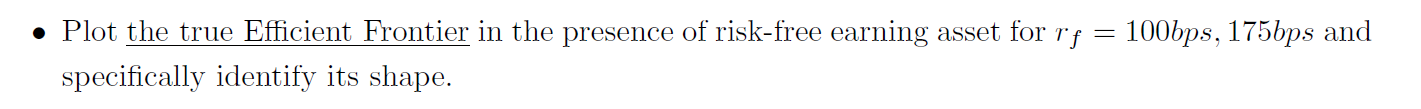

In [13]:
# True Efficient Frontier for rf 100bps
rf = r_f[1]
rf100Coord = tangencyPortfoliosTable["rf:100bps"][numb_assets:] 

#volatility axis (i.e., X)
volatility_100 = [0, rf100Coord.loc["sigmaPi"]] 

#return axis (i.e., Y)
returns_100 = [rf, rf100Coord.loc["muPi"]] 

# final plot of portfolios
fig = px.line(
    x=volatility_100, y=returns_100, color_discrete_sequence=['yellow'],
    labels={"x":"Portfolio Volatilities", "y":"Portfolio Returns"},
    title="Truee Efficient Frontier | Rf = 100bps", markers=True 
)

#mode = 'lines+markers',
fig.update_traces(
    patch={"line": {"color": "white", "width": 2, "dash": 'dot'}}
)

fig.update_traces(marker_size=10, marker_color='yellow')
                  
fig.show()
print("- Conclusion Q2-3 #1: \
The True Efficient frontier in the presence of risk-free earning asset of 100bps has a POSITIVE SLOPE.")

- Conclusion Q2-3 #1: The True Efficient frontier in the presence of risk-free earning asset of 100bps has a POSITIVE SLOPE.


In [14]:
# True Efficient Frontier for rf 175bps
rf = r_f[3]

rf175Coord = tangencyPortfoliosTable["rf:175bps"][numb_assets:] 

#volatility axis (i.e., X)
volatility_175 = [0, rf175Coord.loc["sigmaPi"]] 

#return axis (i.e., Y)
returns_175 = [rf, rf175Coord.loc["muPi"]] 

# final plot of portfolios
fig = px.line(
    x=volatility_175, y=returns_175, color_discrete_sequence=['yellow'],
    labels={"x":"Portfolio Volatilities", "y":"Portfolio Returns"},
    title="Truee Efficient Frontier | Rf = 175bps", markers=True 
)

#mode = 'lines+markers',
fig.update_traces(
    patch={"line": {"color": "white", "width": 2, "dash": 'dot'}}
)

fig.update_traces(marker_size=10, marker_color='red')
                  
fig.show()
print("- Conclusion Q2-3 #2: \
The True Efficient frontier in the presence of risk-free earning asset of 175bps has a NEGATIVE SLOPE. \
This is due to the fact that, in the presence of a RFA earning 175bps, are more short-positions \
in the generated portfolio and, therefore, the general returns at the Efficient Frontier becomes negative.")

- Conclusion Q2-3 #2: The True Efficient frontier in the presence of risk-free earning asset of 175bps has a NEGATIVE SLOPE. This is due to the fact that, in the presence of a RFA earning 175bps, are more short-positions in the generated portfolio and, therefore, the general returns at the Efficient Frontier becomes negative.


***

## Question 3

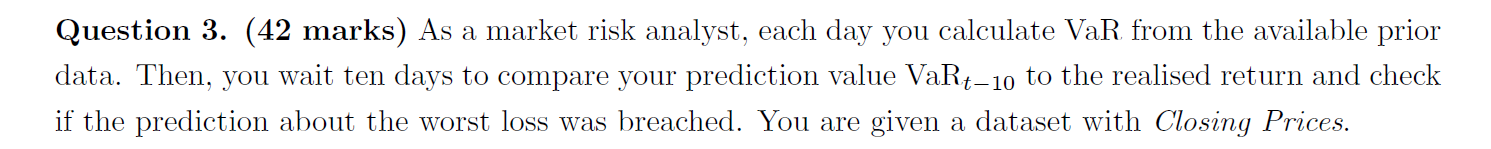

In [15]:
# reading given dataset 
dataset = pd.read_csv("data_SP500.csv")

### Q3-1

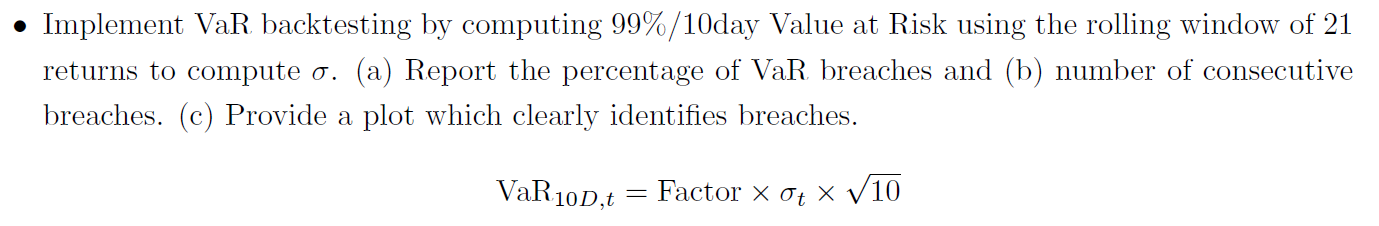

**Initial consideration**

- **Factor Value Estimation**: we will assume a *Normal Factor* (i.e., Standard Normal Percentile) for a given confidence level $C$, where $0< C < 1$. Thus, we will use the inverse Norm. Function $\Phi^{-1}(1-C)$ to estimate its value.

In [16]:
# confidence level
C = 0.99

# VaR Factor | in this case, factor ≈ -2.33
factorZ = norm.ppf(1 - C) 

**Solution Q3-1**: VaR Backtesting

In [17]:
# IMPORTANT!
# ----------
#  In step "iv" we will use 11 datapoints from t+1 to t+1+10 to apply 
#  the forward returns computation. That's why a typical returns calculation
#  cuts 1 period, letting T-1 periods available.
#  However, we want 10 day returns at least to apply the comparisson.

# i. finding daily log returns 
dataset["log_returns"] =  np.log(dataset.SP500).diff()

# ii. finding rolling volatility
dataset["rolling_std"] = dataset.log_returns.rolling(21).std()

# iii. finding VaR99%/10D
dataset["VaR_10D"] = factorZ * dataset.rolling_std * np.sqrt(10)

# iv. finding Forward Returns for comparisson against VaR
dataset["forward_10D_returns"] = np.log(dataset.SP500.shift(-11) \
                                       / dataset.SP500.shift(-1)).dropna()

# v. identifying branches (1: breache, 0: no breaache):
dataset["breaches"] = np.where(
    dataset['forward_10D_returns'] < dataset["VaR_10D"], 
    1, 0
)

#### Q3-1 | (a)

- **Percentage of VaR Breaches**

In [18]:
# total breaches
breachesCount = \
dataset.query("breaches==1").count().values[0]

# percentage of breaches
breachesPct = dataset.dropna().breaches.mean()

# printing results
print("Breaches Report (a)")
print("**"*15)
print(f"- Total breaches: {breachesCount}")
print(f"- Percentage of breaches: {round(breachesPct *100, 3)}%")
print(" ")
print("Important: \
percentage of breaches is computed only over available datapoints. \
'NaN' value-events are not considered. ")

Breaches Report (a)
******************************
- Total breaches: 25
- Percentage of breaches: 2.053%
 
Important: percentage of breaches is computed only over available datapoints. 'NaN' value-events are not considered. 


#### Q3-1 | (b)

- **Number of consecutive Breaches**

In [19]:
# groupby iteration over each breaches !=0 counting its occurrences
dataset["consecutiveBreachesCounter"]=(dataset.breaches.groupby(
    (dataset.breaches != dataset.breaches.shift()).cumsum()
).transform('size') * dataset.breaches -1 ).astype(int)

# getting all breaches counter
counter_breaches_df = \
dataset.query("breaches==1").groupby(
    "consecutiveBreachesCounter"
).count()

# getting of number of consecutive breaches occurrences
breachesOdf = \
((counter_breaches_df.breaches * counter_breaches_df.index) / 
 (counter_breaches_df.index +1)).loc[1:]

# getting pandas containing breaches information
_ = pd.DataFrame(
    (breachesOdf), columns = ["total_consecutives"]
).rename_axis('N Consecutive Breaches').astype(int)

# adding times of N consecutive breaches and reorder
_["occurrences"] = (_.total_consecutives / _.index).astype(int)
_ = _.iloc[:, ::-1]

In [20]:
print("Breaches Report (b)")
print("**"*15)
print("- Number of Consecutive Breaches: ", \
      _.total_consecutives.sum())
print("__" * 15)
print(" ")
print("EXTRA detail about breaches:\n")
print("- It's also possible to identify the number of breaches of N consecutive breaches. So:\n")
print(_)
print(" ")
print("Important: we are considering consecutive breaches based on the >Further Instructions criteria<. \
This document says: '(...)\
For example, the sequence 1, 1, 1 means two consecutive breaches occurred' (p. 3).")

Breaches Report (b)
******************************
- Number of Consecutive Breaches:  14
______________________________
 
EXTRA detail about breaches:

- It's also possible to identify the number of breaches of N consecutive breaches. So:

                        occurrences  total_consecutives
N Consecutive Breaches                                 
1                                 1                   1
2                                 2                   4
3                                 3                   9
 
Important: we are considering consecutive breaches based on the >Further Instructions criteria<. This document says: '(...)For example, the sequence 1, 1, 1 means two consecutive breaches occurred' (p. 3).


#### Q3-1 | (c)

- **Plot identifying the Breaches**

In [21]:
# computing Breaches Value as the average between fwd10D Returns and VaR 
dataset["breaches_mean_value"] = dataset.apply(
        lambda col: \
        (col.forward_10D_returns + col.VaR_10D)/2 \
        if col.breaches == 1 else np.nan, 
        axis=1
    )

In [22]:
# plot that identifies breaches

# inner plot 1: forward 10D returns vs VaR 99%/10D
fig1 = px.line(
    dataset, 
    x= "Date", y=["forward_10D_returns", "VaR_10D"], 
    color_discrete_sequence=['orange', "red"],
    markers=True, width = 1350, height = 600, 
    labels={"x":"Portfolio Volatilities", "y":"Portfolio Returns"},
    title="Analytical VaR - Backtesting | Breaches Identification", 
)

fig1.update_yaxes(title_text="<b>VaR<b> / <b>FwD Returns<b>" )
fig1.update_layout(
    legend_title = "<b>Variables<b>"
)

fig1.update_traces(marker_size=(4.25))

# inner plot 2: breaches mean value scatter
fig2 = px.scatter(
    dataset,
    x="Date", y="breaches_mean_value", color_discrete_sequence=['white'],
).update_traces(
    mode='markers', marker=dict(symbol='circle'), 
    marker_size= 15, marker_opacity=.425
)

# outer plot: combination of two inner plots
fig3 = go.Figure(data=fig1.data + fig2.data)

fig3.update_layout(
    template = "plotly_dark", 
    width = 1850, 
    height = 700, 
    legend_title = "<b>Variables<b>", 
    title="Analytical VaR - Backtesting | Breaches Identification (white circles)", )

fig3.update_yaxes(title_text="<b>VaR<b> / <b>FwD Returns<b>" )
fig3.update_xaxes(title_text="<b>Date<b>" )

### Q3-2

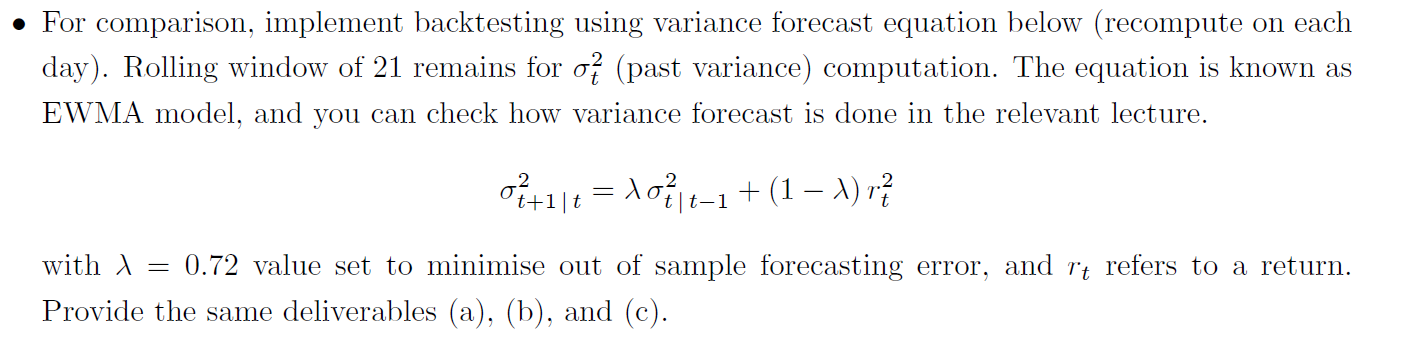

**Solution Q3-2**:

In [23]:
# defining lambda value
lambdaVal = 0.72

# empty list to collect new variances
newEwmaVariances = []

# definition of rolling var 
dataset["rolling_var"] = dataset.rolling_std ** 2

# iteration over each event of dataset
for idxVal in range(0, dataset.shape[0]):
    # if we are in the first event, set newVariance as NaN
    # because there is no previous event...
    if idxVal == 0:
        newEwmaVariances.append(np.nan)
    # otherwhise, compute the EWMA Var from the given formulae
    else:
        ewmaNewVar = (lambdaVal * dataset["rolling_var"][idxVal - 1]) \
        + (1-lambdaVal)*(dataset["log_returns"][idxVal-1]**2)
        newEwmaVariances.append(ewmaNewVar)
        
# next, we set the EwmaStd as sqroot of the list of new ewma Variances
dataset["rolling_EwmaStd"]=np.sqrt(np.array(newEwmaVariances))

#computing VaR10D using EwmaStd
dataset["VaR_10D_ewmastd"] = factorZ * dataset.rolling_EwmaStd * np.sqrt(10)

#finally, finding breaches from fwd 10d returns vs VaR10d ewma std 
dataset["breaches_ewmastd"] = np.where(
    dataset['forward_10D_returns'] < dataset["VaR_10D_ewmastd"], 
    1, 0
)

#### Q3-2 | (a)

- **Percentage of VaR Breaches | EWMA $\sigma$**

In [24]:
# total EWMA STD VAR breaches
breachesCount_ewma = \
dataset.query("breaches_ewmastd == 1").count().values[0]

# percentage of EWMA STD VAR breaches
breachesPctEwma = dataset.breaches_ewmastd.sum() /\
dataset[["forward_10D_returns", "VaR_10D_ewmastd"]].dropna().shape[0]

# printing results
print("Breaches Report | EWMA Std for VaR | (a)")
print("**"*15)
print(f"- Total breaches: {breachesCount_ewma}")
print(f"- Percentage of breaches: {round(breachesPctEwma *100, 3)}%")
print(" ")
print("Important: \
percentage of breaches is computed only over available datapoints. \
'NaN' value-events are not considered. ")

Breaches Report | EWMA Std for VaR | (a)
******************************
- Total breaches: 30
- Percentage of breaches: 2.465%
 
Important: percentage of breaches is computed only over available datapoints. 'NaN' value-events are not considered. 


#### Q3-2 | (b)

- **Number of consecutive Breaches | EWMA $\sigma$**

In [25]:
# groupby iteration over each EWMA breaches !=0 counting its occurrences
dataset["consecutive_EWMA_BreachesCounter"]=(dataset.breaches_ewmastd.groupby(
    (dataset.breaches_ewmastd != dataset.breaches_ewmastd.shift()).cumsum()
).transform('size') * dataset.breaches_ewmastd -1 ).astype(int)

# getting all EWMA breaches counter
counter_breaches_ewma_df = \
dataset.query("breaches_ewmastd==1").groupby(
    "consecutive_EWMA_BreachesCounter"
).count()

# getting of number of consecutive EWMA breaches occurrences
breachesOdfEWMA = \
((counter_breaches_ewma_df.breaches_ewmastd * counter_breaches_ewma_df.index) / 
 (counter_breaches_ewma_df.index + 1)).loc[1:]

# getting pandas containing EWMA breaches information
_EWMA = pd.DataFrame(
    (breachesOdfEWMA), columns = ["total_consecutives"]
).rename_axis('N Consecutive EWMA-VAR Breaches').astype(int)

# adding times of N consecutive breaches and reorder
_EWMA["occurrences"] = (_EWMA.total_consecutives / _EWMA.index).astype(int)
_EWMA = _EWMA.iloc[:, ::-1]

In [26]:
print("EWMA-VaR Breaches Report (b)")
print("**"*15)
print("- Number of Consecutive EWMA-VaR Breaches: ", \
      _EWMA.total_consecutives.sum())
print("__" * 15)
print(" ")
print("EXTRA detail about EWMA-VaR breaches:\n")
print("- It's also possible to identify the number of EWMA-VaR breaches of N consecutive breaches. So:\n")
print(_EWMA)
print(" ")
print("Important: we are considering consecutive breaches based on the >Further Instructions criteria<. \
This document says: '(...)\
For example, the sequence 1, 1, 1 means two consecutive breaches occurred' (p. 3).")

EWMA-VaR Breaches Report (b)
******************************
- Number of Consecutive EWMA-VaR Breaches:  15
______________________________
 
EXTRA detail about EWMA-VaR breaches:

- It's also possible to identify the number of EWMA-VaR breaches of N consecutive breaches. So:

                                 occurrences  total_consecutives
N Consecutive EWMA-VAR Breaches                                 
1                                          4                   4
2                                          2                   4
3                                          1                   3
4                                          1                   4
 
Important: we are considering consecutive breaches based on the >Further Instructions criteria<. This document says: '(...)For example, the sequence 1, 1, 1 means two consecutive breaches occurred' (p. 3).


#### Q3-2 | (c)

- **Plot identifying the Breaches | EWMA $\sigma$**

In [27]:
# computing Breaches Value as the average between fwd10D Returns and VaR 
dataset["breaches_EWMA_mean_value"] = dataset.apply(
        lambda col: \
        (col.forward_10D_returns + col.VaR_10D_ewmastd)/2 \
        if col.breaches_ewmastd == 1 else np.nan, 
        axis=1
    )

In [28]:
# plot that identifies EWMA breaches

# inner plot 1: forward 10D returns vs EWMA VaR 99%/10D
fig1E = px.line(
    dataset, 
    x= "Date", y=["forward_10D_returns", "VaR_10D_ewmastd"], 
    color_discrete_sequence=['orange', "red"],
    markers=True, width = 1350, height = 600, 
    labels={"x":"Portfolio Volatilities", "y":"Portfolio Returns"},
    title="Analytical EWMA-σ VaR - Backtesting | Breaches Identification", 
)

fig1E.update_yaxes(title_text="<b>EWMA-σ VaR<b> / <b>FwD Returns<b>" )
fig1E.update_layout(
    legend_title = "<b>Variables<b>"
)

fig1E.update_traces(marker_size=(4.25))

# inner plot 2: EWMA VAR breaches mean value scatter
fig2E = px.scatter(
    dataset,
    x="Date", y="breaches_EWMA_mean_value", color_discrete_sequence=['white']
).update_traces(
    mode='markers', marker=dict(symbol='circle'), 
    marker_size= 15, marker_opacity=.425
)

# outer plot: combination of two inner plots
fig3E = go.Figure(data=fig1E.data + fig2E.data)

fig3E.update_layout(
    template = "plotly_dark", 
    width = 1850, 
    height = 700, 
    legend_title = "<b>Variables<b>", 
    title="Analytical EWMA-σ VaR - Backtesting | Breaches Identification (white circles)", )

fig3E.update_yaxes(title_text="<b>EWMA-σ VaR<b> / <b>FwD Returns<b>" )
fig3E.update_xaxes(title_text="<b>Date<b>" )

#### Appendix Q3 | EXTRA

Rolling Ewma-σ vs. Rolling Historical-σ | Comparison

In [29]:
fig = px.line(
    dataset, 
    x= "Date", y=["rolling_EwmaStd", "rolling_std"], 
    color_discrete_sequence=['red', "white"],
    markers=True, width = 1000, height = 600, 
    labels={"x":"Portfolio Volatilities", "y":"Portfolio Returns"},
    title="Rolling EWMA-σ vs. Rolling Historical-σ | Comparison", 
)

newnames = {
    'rolling_EwmaStd':'21D_rolling_EwmaStd', 
    'rolling_std': '21D_rolling_std'}
fig.for_each_trace(
    lambda t: t.update(
        name = newnames[t.name],
        legendgroup = newnames[t.name],
        hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
    )
)

fig.show()

***

## Question 4

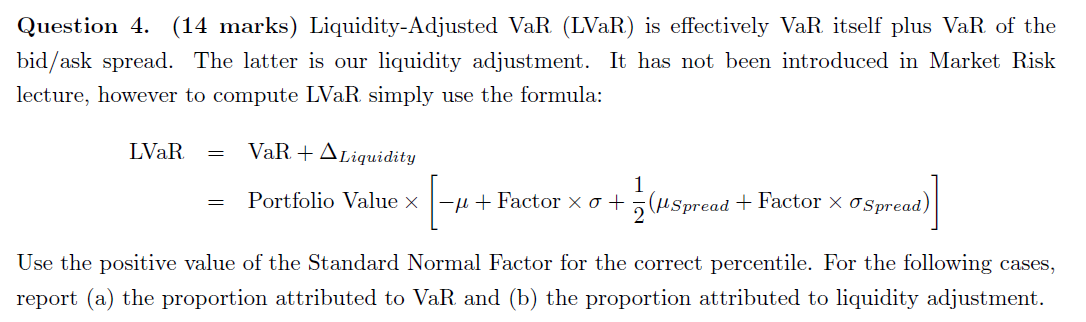

In [30]:
# defining positive normal factor
positiveFactor = abs(factorZ)

### Q4-(A)

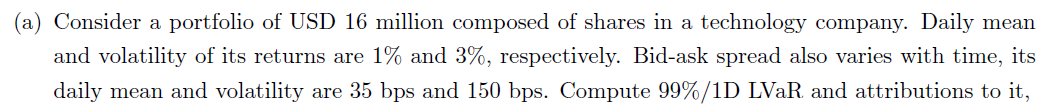

In [31]:
# I. collecting information

# portfolio value
portfolioValue = 16

# daily mean of returns
mu = 0.01

# daily volatility of returns
sd = 0.03

# mean bid-ask spread
ba_spread_mu = 35/1e4

# volatility bid-ask spread
ba_spread_sd = 150/1e4

# II. Liquidity VaR Estimation

# proportion attributed to VaR
VaR = portfolioValue * (-mu + (positiveFactor*sd))

# proportion attributed to liquidity adjust.
dLiquidity = portfolioValue \
*(1/2)*(ba_spread_mu + (positiveFactor * ba_spread_sd))

# Liquidity VaR
LVaR = VaR + dLiquidity

print("Solution Q4-1(A):")
print("**"*30)
print(" - (a) Proportion attributed to VaR: ", VaR, "|", f"({round((VaR/LVaR), 7)*100}%)")
print(" - (b) Proportion attributed to Liquidity Adjustment: ", dLiquidity, "|",
      f"({round((dLiquidity/LVaR), 7)*100}%)")
print(" - General Liquidity VaR: ", LVaR,  "|", "(100%)")

Solution Q4-1(A):
************************************************************
 - (a) Proportion attributed to VaR:  0.9566469795396034 | (75.69555%)
 - (b) Proportion attributed to Liquidity Adjustment:  0.3071617448849009 | (24.30445%)
 - General Liquidity VaR:  1.2638087244245044 | (100%)


### Q4-(B)

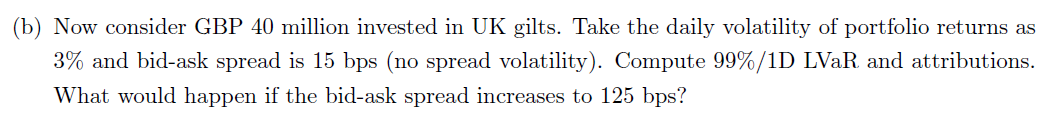

In [32]:
# I. collecting information

# portfolio value
portfolioValue = 40

# daily mean of returns
mu = 0.0

# daily volatility of returns
sd = 0.03

# mean bid-ask spread
ba_spread_mu = 15/1e4

# volatility bid-ask spread
ba_spread_sd = 0

# II. Liquidity VaR Estimation

# proportion attributed to VaR
VaR = portfolioValue * (-mu + (positiveFactor*sd))

# proportion attributed to liquidity adjust.
dLiquidity = portfolioValue \
*(1/2)*(ba_spread_mu + (positiveFactor * ba_spread_sd))

# Liquidity VaR
LVaR = VaR + dLiquidity

print("Solution Q4-1(B) | Part I:")
print("**"*30)
print(" - (a) Proportion attributed to VaR: ", VaR, "|", f"({round((VaR/LVaR), 7)*100}%)")
print(" - (b) Proportion attributed to Liquidity Adjustment: ", dLiquidity, "|",
      f"({round((dLiquidity/LVaR), 7)*100}%)")
print(" - General Liquidity VaR: ", LVaR, "|", "(100%)")
print(" ")
print("--"*30)
print(" ")
print("Solution Q4-1(B) | Part II: \n >> Modification: increasing mu bid-ask spread to 125bps.")
print("**"*30)

# mean bid-ask spread
ba_spread_mu = 125/1e4

# proportion attributed to VaR
VaR = portfolioValue * (-mu + (positiveFactor*sd))

# proportion attributed to liquidity adjust.
dLiquidity = portfolioValue \
*(1/2)*(ba_spread_mu + (positiveFactor * ba_spread_sd))

# Liquidity VaR
LVaR = VaR + dLiquidity
print(" - (a) Proportion attributed to VaR: ", VaR, "|", f"({round((VaR/LVaR), 5)*100}%)")
print(" - (b) Proportion attributed to Liquidity Adjustment: ", dLiquidity, "|",
      f"({round((dLiquidity/LVaR), 5)*100}%)")
print(" - General Liquidity VaR: ", LVaR, "|", "(100%)")
print(" ")

print(">> Inquiry: 'What would happen if the bid-ask spread increases to 125 bps?'")
print(">> Answer: \
An increasing in the bid-ask spread will generate a proportional increase in the Liquidity Adjustment.")
# importa que tenga volatilidad el bid-ask spread 

Solution Q4-1(B) | Part I:
************************************************************
 - (a) Proportion attributed to VaR:  2.7916174488490086 | (98.93678%)
 - (b) Proportion attributed to Liquidity Adjustment:  0.03 | (1.06322%)
 - General Liquidity VaR:  2.8216174488490084 | (100%)
 
------------------------------------------------------------
 
Solution Q4-1(B) | Part II: 
 >> Modification: increasing mu bid-ask spread to 125bps.
************************************************************
 - (a) Proportion attributed to VaR:  2.7916174488490086 | (91.781%)
 - (b) Proportion attributed to Liquidity Adjustment:  0.25 | (8.219%)
 - General Liquidity VaR:  3.0416174488490086 | (100%)
 
>> Inquiry: 'What would happen if the bid-ask spread increases to 125 bps?'
>> Answer: An increasing in the bid-ask spread will generate a proportional increase in the Liquidity Adjustment.
